In [1]:
import os, sys

sys.path.insert(0, os.path.abspath("../../.."))

In [2]:
from models.xgboost.model_2.model_2 import XgboostModel2
import pandas as pd
from pandas.plotting import scatter_matrix
from lib.data_splitter import split_features_and_target_into_train_and_test_set
from lib.data_util import load_candlesticks
from matplotlib import cm


In [3]:
candlesticks = load_candlesticks("BTCUSDT", "1h", custom_tmp_path="../../../tmp")

candlesticks

Closetime of newest candle is 1587038399999
Only using data on file. Will not download new data from Binance.


,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,9.260828e+04
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,2.079532e+04
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,1.129135e+04
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
23252,1587020400000,6688.63,6818.46,6686.39,6780.00,3399.164609,1587023999999,2.300670e+07,22202,1901.518707,1.285952e+07
23253,1587024000000,6893.24,6923.52,6871.13,6888.30,1641.824781,1587027599999,1.132671e+07,12148,873.070968,6.024127e+06
23254,1587027600000,7045.30,7097.00,7017.00,7027.09,4302.835917,1587031199999,3.038567e+07,31923,2361.179694,1.667550e+07
23255,1587031200000,7027.70,7061.80,7026.77,7040.00,1512.420788,1587034799999,1.066239e+07,12131,938.969209,6.619599e+06


1
2


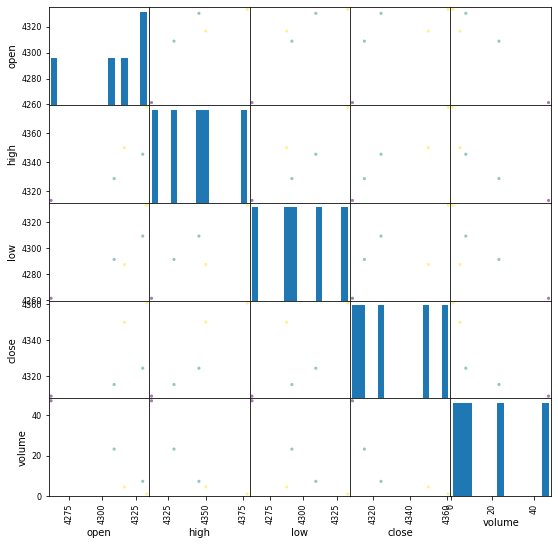

In [4]:
features = XgboostModel2.generate_features(candlesticks)
target = XgboostModel2.generate_target(features)
(
    training_set_features,
    training_set_target,
    test_set_features,
    test_set_target,
) = split_features_and_target_into_train_and_test_set(features, target, 20)

print("1")
cmap = cm.get_cmap("gnuplot")
print("2")
scatte = scatter_matrix(training_set_features.iloc[:5, :5], c=training_set_target.iloc[:5], s=40, hist_kwds={"bins": 15}, figsize=(9,9))

In [6]:
xg_boost = XgboostModel2()
xg_boost.train(training_set_features, training_set_target)
xg_boost.evaluate(test_set_features, test_set_target)
xg_boost.print_info()

Closetime of newest candle is 1 Jan, 2017
Only using data on file. Will not download new data from Binance.


AttributeError: 'NoneType' object has no attribute 'drop'